In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import folium

# Creating Geospatial Maps to Represent Data

In [2]:
tnd_data = pd.read_csv('data/clean/tornado_data.csv')
tnd_climate = pd.read_csv('data/clean/all_counties_tnd_climate_combined.csv')

In [3]:
tnd_climate.loc[tnd_climate['County'] == 'Menominee County', 'TndOcc'] = None
tnd_climate.loc[tnd_climate['County'] == 'Menominee County', 'Count'] = None
tnd_climate[tnd_climate['County'] == 'Menominee County']

Year            County     AvgTmp  AvgMaxTmp  AvgMinTmp  AvgPrecip  \
39    1950  Menominee County  15.500000  26.266667   4.700000   2.216667   
111   1951  Menominee County  16.300000  26.266667   6.300000   2.046667   
183   1952  Menominee County  19.133333  28.900000   9.433333   1.450000   
255   1953  Menominee County  20.333333  29.666667  11.000000   1.840000   
327   1954  Menominee County  20.733333  30.800000  10.666667   1.243333   
...    ...               ...        ...        ...        ...        ...   
4791  2016  Menominee County  24.866667  33.533333  16.133333   1.953333   
4863  2017  Menominee County  24.533333  33.433333  15.633333   1.796667   
4935  2018  Menominee County  20.466667  30.766667  10.200000   1.170000   
5007  2019  Menominee County  16.833333  27.066667   6.633333   2.270000   
5079  2020  Menominee County  24.833333  33.800000  15.833333   2.133333   

      TotPrecip  MaxTmp  MinTmp  AvgMag  Fat  Inj  Count  MaxMag  TndOcc  
39         6.65    32.0    -1.0     NaN  NaN  NaN    NaN     NaN     NaN  
111        6.14    32.8    -0.7     NaN  NaN  NaN    NaN     NaN     NaN  
183        4.35    33.7     3.5     NaN  NaN  NaN    NaN     NaN     NaN  
255        5.52    36.9     4.7     NaN  NaN  NaN    NaN     NaN     NaN  
327        3.73    35.7     1.4     NaN  NaN  NaN    NaN     NaN     NaN  
...         ...     ...     ...     ...  ...  ...    ...     ...     ...  
4791       5.86    45.0     8.6     NaN  NaN  NaN    NaN     NaN     NaN  
4863       5.39    37.7    11.1     NaN  NaN  NaN    NaN     NaN     NaN  
4935       3.51    40.0     5.9     NaN  NaN  NaN    NaN     NaN     NaN  
5007       6.81    37.2     2.6     NaN  NaN  NaN    NaN     NaN     NaN  
5079       6.40    41.8     6.9     NaN  NaN  NaN    NaN     NaN     NaN  

[71 rows x 15 columns]

In [4]:
coord_data = tnd_data[(tnd_data['slat'] != 0) & (tnd_data['slon'] != 0)][['Year','slat', 'slon']]
coord_data.head()

Year   slat   slon
0  1950  45.42 -91.00
1  1950  45.57 -90.30
2  1950  44.83 -90.35
3  1950  45.58 -89.58
4  1950  43.95 -88.95

In [5]:
wis = geopandas.read_file('data/wisconsin/cb_2020_55_cousub_500k.shp')
wis.head()

STATEFP COUNTYFP COUSUBFP  COUSUBNS             AFFGEOID       GEOID  \
0      55      029    15025  01582965  0600000US5502915025  5502915025   
1      55      073    49075  01583648  0600000US5507349075  5507349075   
2      55      078    50975  01583694  0600000US5507850975  5507850975   
3      55      031    01825  01582692  0600000US5503101825  5503101825   
4      55      081    40925  01583503  0600000US5508140925  5508140925   

         NAME         NAMELSAD STUSPS        NAMELSADCO STATE_NAME LSAD  \
0  Clay Banks  Clay Banks town     WI       Door County  Wisconsin   43   
1    Marathon    Marathon town     WI   Marathon County  Wisconsin   43   
2   Menominee   Menominee town     WI  Menominee County  Wisconsin   43   
3     Amnicon     Amnicon town     WI    Douglas County  Wisconsin   43   
4   Lafayette   Lafayette town     WI     Monroe County  Wisconsin   43   

       ALAND     AWATER                                           geometry  
0   38338938  454388330  POLYGON ((-87.39750 44.69732, -87.39749 44.707...  
1   84752273      81300  MULTIPOLYGON (((-89.83399 44.93954, -89.83127 ...  
2  926217566   19022479  POLYGON ((-88.98246 45.11800, -88.97678 45.117...  
3  100651928     511017  POLYGON ((-91.93113 46.58977, -91.93108 46.592...  
4   91454722      81537  POLYGON ((-90.79182 44.07140, -90.77436 44.071...

In [6]:
county_total = tnd_climate.groupby('County')[['Count', 'AvgTmp', 'AvgPrecip', 'MaxTmp', 'MinTmp']].mean()
county_total.columns = ['AvgTndCount', 'AvgWintTmp', 'AvgWintPrecip', 'AvgMaxWintTmp', 'AvgMinWintTmp']
county_total.head()

AvgTndCount  AvgWintTmp  AvgWintPrecip  AvgMaxWintTmp  \
County                                                                   
Adams County        0.295775   21.415962       1.363756      40.659155   
Ashland County      0.169014   16.425352       1.340751      36.183099   
Barron County       0.492958   17.530047       1.174601      37.984507   
Bayfield County     0.056338   16.631455       1.224601      36.338028   
Brown County        0.309859   21.806103       1.481784      38.301408   

                 AvgMinWintTmp  
County                          
Adams County          3.860563  
Ashland County       -1.225352  
Barron County        -1.115493  
Bayfield County      -1.190141  
Brown County          6.769014

In [7]:
wis_counties = geopandas.read_file('data/wisconsin/County_Boundaries_24K.shp')
wis_counties.head()

OBJECTID            DNR_REGION  DNR_CNTY_C COUNTY_NAM COUNTY_FIP  \
0       321      Southeast Region          30    Kenosha         59   
1       322  South Central Region          33  Lafayette         65   
2       323  South Central Region          54       Rock        105   
3       324      Southeast Region          65   Walworth        127   
4       325  South Central Region          23      Green         45   

      SHAPEAREA       SHAPELEN  \
0  7.210454e+08  123267.303863   
1  1.641795e+09  164707.650040   
2  1.879382e+09  174114.587670   
3  1.492598e+09  154833.279357   
4  1.512855e+09  155741.104373   

                                            geometry  
0  MULTIPOLYGON (((699813.437 246226.688, 699794....  
1  POLYGON ((503148.082 260278.466, 503292.672 26...  
2  POLYGON ((600602.683 264347.425, 603850.419 26...  
3  POLYGON ((658404.520 263083.277, 658417.776 26...  
4  POLYGON ((571551.903 263810.562, 571555.279 26...

In [8]:
wis_climate = wis_counties[['COUNTY_NAM', 'SHAPEAREA', 'SHAPELEN', 'geometry']]
for county in county_total.index.values:
    wis_climate.loc[wis_climate['COUNTY_NAM'] == " ".join(county.split(' ')[0:-1]), 'AvgWintTmp'] = county_total.loc[county, 'AvgWintTmp']
    wis_climate.loc[wis_climate['COUNTY_NAM'] == " ".join(county.split(' ')[0:-1]), 'AvgWintPrecip'] = county_total.loc[county, 'AvgWintPrecip']
    wis_climate.loc[wis_climate['COUNTY_NAM'] == " ".join(county.split(' ')[0:-1]), 'AvgTndCount'] = county_total.loc[county, 'AvgTndCount']
    wis_climate.loc[wis_climate['COUNTY_NAM'] == " ".join(county.split(' ')[0:-1]), 'AvgMaxWintTmp'] = county_total.loc[county, 'AvgMaxWintTmp']
    wis_climate.loc[wis_climate['COUNTY_NAM'] == " ".join(county.split(' ')[0:-1]), 'AvgMinWintTmp'] = county_total.loc[county, 'AvgMinWintTmp']

C:\Users\chris\anaconda3\envs\map\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\chris\anaconda3\envs\map\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\chris\anaconda3\envs\map\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [9]:
wis_climate[wis_climate['AvgWintTmp'].isnull()]

Empty GeoDataFrame
Columns: [COUNTY_NAM, SHAPEAREA, SHAPELEN, geometry, AvgWintTmp, AvgWintPrecip, AvgTndCount, AvgMaxWintTmp, AvgMinWintTmp]
Index: []

(271079.1312666612, 793796.2406526085, 199644.33154504123, 759862.9191189639)

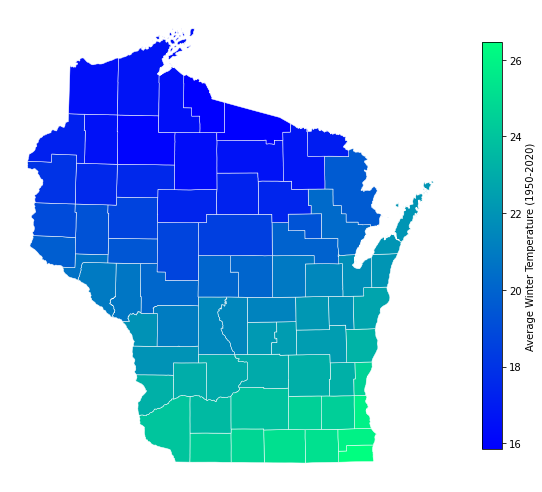

In [10]:
ax = wis_climate.plot(
    legend_kwds={'shrink': 0.75, 'label': 'Average Winter Temperature (1950-2020)'}, 
    column = 'AvgWintTmp', 
    cmap='winter', 
    legend=True, 
    linewidth=0.5, 
    edgecolor='white', 
    figsize=(10,10))
ax.axis('off')

(271079.1312666612, 793796.2406526085, 199644.33154504123, 759862.9191189639)

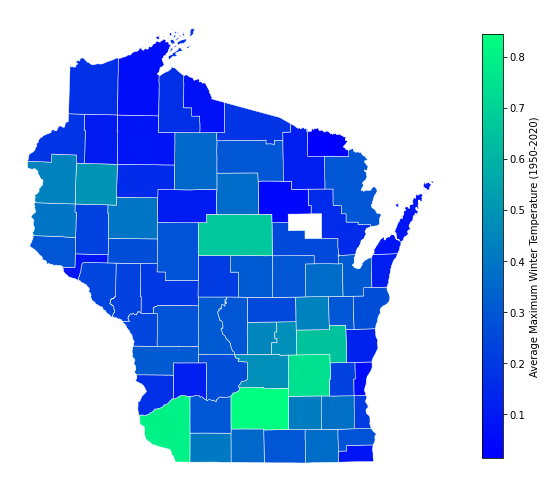

In [16]:
ax = wis_climate.plot(
    legend_kwds={'shrink': 0.78, 'label': 'Average Maximum Winter Temperature (1950-2020)'}, 
    column = 'AvgMaxWintTmp', 
    cmap='winter', 
    legend=True, 
    linewidth=0.5, 
    edgecolor='white', 
    figsize=(10,10))
ax.axis('off')

(271079.1312666612, 793796.2406526085, 199644.33154504123, 759862.9191189639)

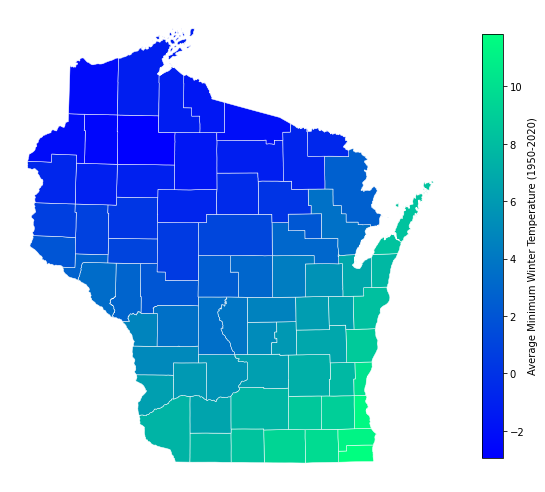

In [12]:
ax = wis_climate.plot(
    legend_kwds={'shrink': 0.78, 'label': 'Average Minimum Winter Temperature (1950-2020)'}, 
    column = 'AvgMinWintTmp', 
    cmap='winter', 
    legend=True, 
    linewidth=0.5, 
    edgecolor='white', 
    figsize=(10,10))
ax.axis('off')

(271079.1312666612, 793796.2406526085, 199644.33154504123, 759862.9191189639)

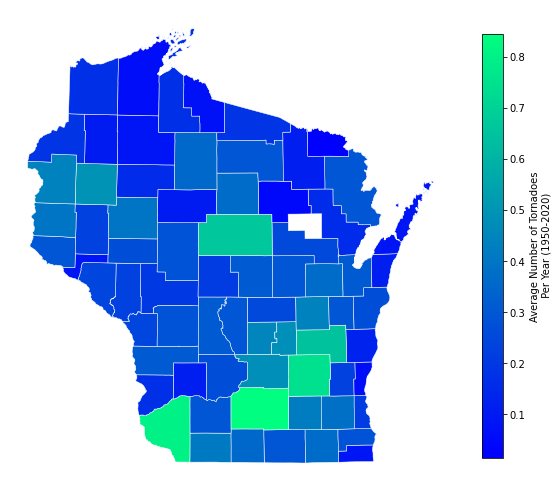

In [18]:
ax = wis_climate[wis_climate['COUNTY_NAM'] != 'Menominee'].plot(
    legend_kwds={'shrink': 0.78, 'label': 'Average Number of Tornadoes\n Per Year (1950-2020)'}, 
    column = 'AvgTndCount', 
    cmap='winter', 
    legend=True, 
    linewidth=0.5, 
    edgecolor='white', 
    figsize=(10,10))
ax.axis('off')

In [14]:
int_map_data = wis_climate[['COUNTY_NAM', 'AvgTndCount', 'AvgWintTmp', 'AvgWintPrecip', 'SHAPEAREA', 'SHAPELEN', 'geometry']]
int_map_data.columns = ['County', 'Average Number of Tornadoes Per Year', 'Average Winter Temperature', 'Average Winter Precipitation', 'SHAPEAREA', 'SHAPELEN', 'geometry']
map = int_map_data.explore(     
     column="Average Number of Tornadoes Per Year",
     tooltip=['County','Average Number of Tornadoes Per Year', 'Average Winter Temperature', 'Average Winter Precipitation'],
     popup=False,
     tiles="CartoDB Positron",
     cmap="winter", 
     style_kwds=dict(color="black")
)
map

# Final Mapping Tool For 2022 Tornado Prediction

In [21]:
pred_data = pd.read_csv('data/clean/interactive_map_data')

In [22]:
pred_map = wis_counties[['COUNTY_NAM', 'SHAPEAREA', 'SHAPELEN', 'geometry']]

In [23]:
for county in pred_data['County'].unique():
    pred_map.loc[wis_climate['COUNTY_NAM'] == " ".join(county.split(' ')[0:-1]), 'AvgAvgMaxWintTmp_5'] = float(pred_data.loc[pred_data['County'] == county, 'AvgAvgMaxTmp_5'])
    pred_map.loc[wis_climate['COUNTY_NAM'] == " ".join(county.split(' ')[0:-1]), 'Lst1YrTnd'] = int(pred_data.loc[pred_data['County'] == county, 'Lst1YrTnd'])
    pred_map.loc[wis_climate['COUNTY_NAM'] == " ".join(county.split(' ')[0:-1]), '2022Pred'] = int(pred_data.loc[pred_data['County'] == county, '2022Pred'])

C:\Users\chris\anaconda3\envs\map\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\chris\anaconda3\envs\map\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\chris\anaconda3\envs\map\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [24]:
pred_map.loc[pred_map['2022Pred'] == 0, '2022Pred'] = 'no'
pred_map.loc[pred_map['2022Pred'] == 1, '2022Pred'] = 'yes'
pred_map.loc[pred_map['Lst1YrTnd'] == 0, 'Lst1YrTnd'] = 'no'
pred_map.loc[pred_map['Lst1YrTnd'] == 1, 'Lst1YrTnd'] = 'yes'

C:\Users\chris\AppData\Local\Temp\ipykernel_11864\2327068328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_map.loc[pred_map['2022Pred'] == 0, '2022Pred'] = 'no'
C:\Users\chris\AppData\Local\Temp\ipykernel_11864\2327068328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_map.loc[pred_map['Lst1YrTnd'] == 0, 'Lst1YrTnd'] = 'no'


In [25]:
pred_map.head()

COUNTY_NAM     SHAPEAREA       SHAPELEN  \
0    Kenosha  7.210454e+08  123267.303863   
1  Lafayette  1.641795e+09  164707.650040   
2       Rock  1.879382e+09  174114.587670   
3   Walworth  1.492598e+09  154833.279357   
4      Green  1.512855e+09  155741.104373   

                                            geometry  AvgAvgMaxWintTmp_5  \
0  MULTIPOLYGON (((699813.437 246226.688, 699794....           35.853333   
1  POLYGON ((503148.082 260278.466, 503292.672 26...           33.773333   
2  POLYGON ((600602.683 264347.425, 603850.419 26...           34.100000   
3  POLYGON ((658404.520 263083.277, 658417.776 26...           34.393333   
4  POLYGON ((571551.903 263810.562, 571555.279 26...           33.940000   

  Lst1YrTnd 2022Pred  
0        no       no  
1        no      yes  
2       yes      yes  
3        no      yes  
4        no      yes

In [26]:
pred_map.columns = ['County', 'SHAPEAREA', 'SHAPELEN', 'geometry', '5 Year Average Max Winter Temp', 'Tornado Occurred Last Year', 'Tornado Will Occur In 2022']

In [27]:
map = pred_map.explore(     
     column='Tornado Will Occur In 2022',
     tooltip=['County', '5 Year Average Max Winter Temp', 'Tornado Occurred Last Year', 'Tornado Will Occur In 2022'],
     popup=False,
     tiles="CartoDB Positron",
     cmap="winter", 
     style_kwds=dict(color="black")
)

In [28]:
map.save(r'C:\Users\chris\OneDrive - University of Wisconsin-La Crosse\Classes\computer_science\Cs461\project_reports\images\int_map.html')